In [ ]:
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


In [19]:
df = pd.read_csv(r"C:\Users\Kritika Singh\Downloads\Zomatodata.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [22]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [24]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handlerate)
print (df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of resturants')

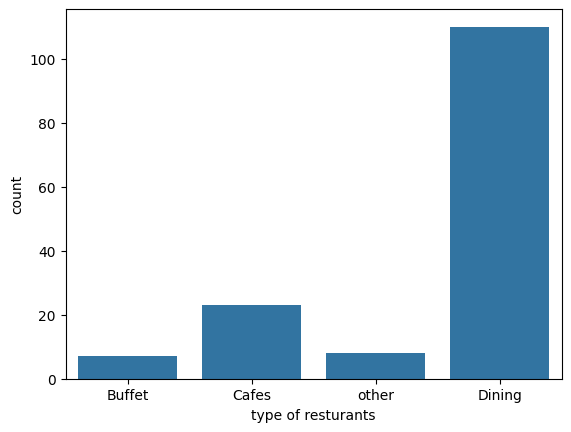

In [27]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturants")

In [ ]:
# majority prefrence is of dining resturants

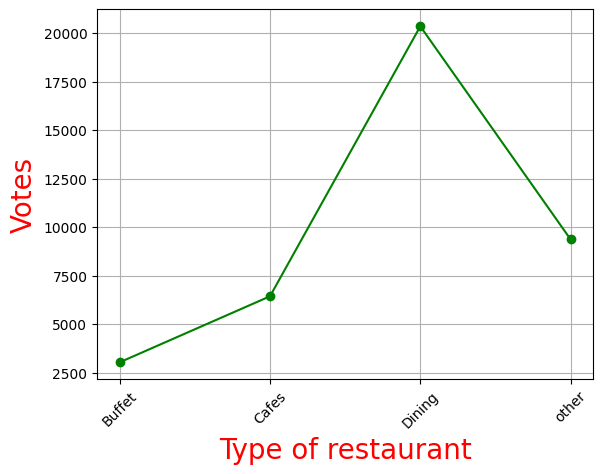

In [29]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = grouped_data.reset_index(name='votes')

plt.plot(result['listed_in(type)'], result['votes'], c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# dining restaurants have maximum votes

<function matplotlib.pyplot.show(close=None, block=None)>

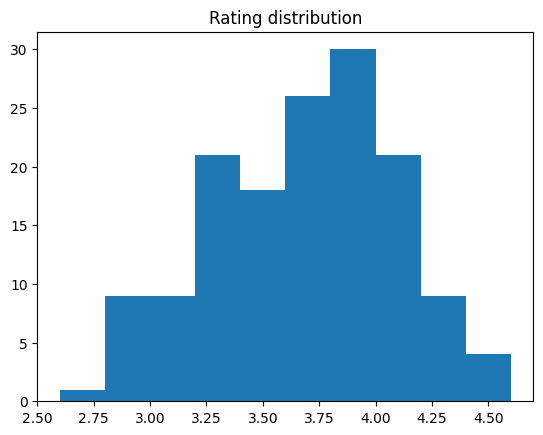

In [31]:
plt.hist(df['rate'], bins =10)
plt.title ("Rating distribution")
plt.show

In [ ]:
# maximum ratinngs hve been in between 3.5-4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

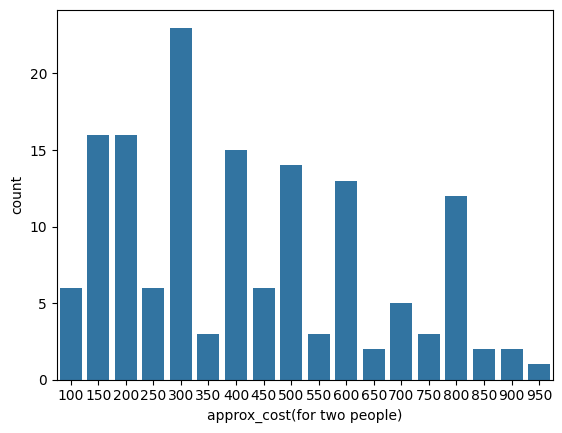

In [33]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [ ]:
# maximum amount spent by couples usually is 300/-

<Axes: xlabel='online_order', ylabel='rate'>

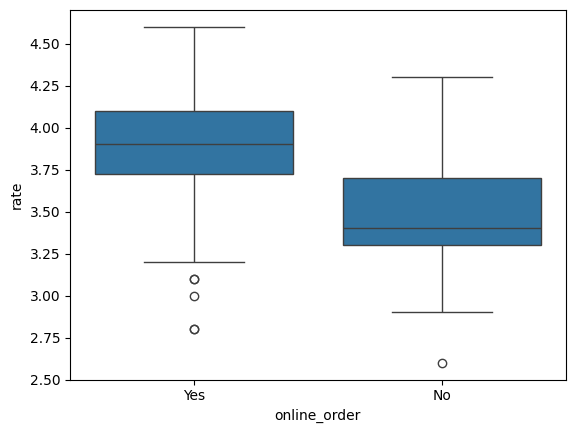

In [34]:
plt.Figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

In [ ]:
# there are more ratings in online order than that of offline orders

<function matplotlib.pyplot.show(close=None, block=None)>

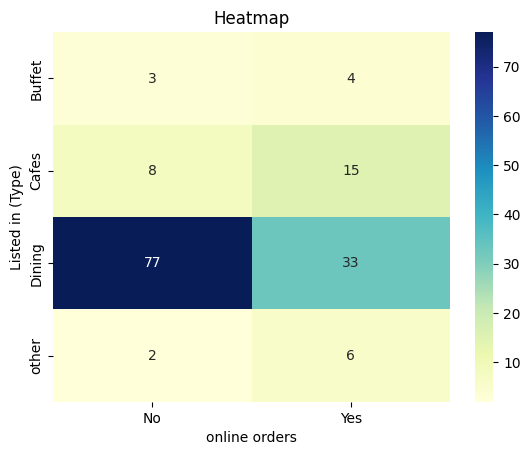

In [35]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("online orders")
plt.ylabel("Listed in (Type)")
plt.show

In [ ]:
# dinings have more offline orders whereas cafes have more online orders